In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from scipy.optimize import curve_fit

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
c=3.0e8
l0_Cak=3932.7
l0_CaH=3967.6
l0_Ha=6561.0

In [3]:
G = ['NGC 1357','NGC 1832','NGC 2276','NGC 2775','NGC 2903','NGC 3034','NGC 3147','NGC 3227','NGC 3245',\
'NGC 3310','NGC 3368','NGC 3471','NGC 3516','NGC 3623','NGC 3627','NGC 3941','NGC 4472','NGC 4631','NGC 4775',\
'NGC 5248','NGC 5548','NGC 5866','NGC 6181','NGC 6217','NGC 6643','NGC 6764','NGC 7469']

In [4]:
D=[0.925,0.893,0.891,1.228,3.545,3.163,1.123,1.558,0.801,1.019,2.350,0.458,0.498,3.051,2.702,1.024,1.692,\
  4.369,0.657,1.654,0.410,1.681,0.772,0.695,1.140,0.665,0.543]

In [5]:
l_CaK=[3961.4,3959.1,3962.9,3952.9,3937.4,3935.8,3966.8,3944.3,3947.4,3945.1,3944.3,3960.6,3968.4,3938.1,\
      3941.2,3944.3,3946.7,3934.3,3956.0,3943.6,4000.1,3941.2,3963.7,3948.2,3950.5,3958.3,3993.9]

In [6]:
l_CaH=[3996.2,3994.7,3997.0,3986.9,3972.2,3970.7,4001.7,3982.3,3983.1,3971.5,3980.0,3989.3,4000.9,3974.6,\
      3976.9,3979.2,3974.6,3973.8,3989.3,3980.7,4037.3,3970.7,3997.8,3984.6,3985.4,3997.8,4033.4]

In [7]:
l_Ha=[6606.7,6605.1,6614.1,6590.4,6574.2,6562.5,6620.6,6585.0,6609.8,6578.0,6581.9,6609.0,6605.9,6578.0,\
     6577.3,6601.3,6612.1,6575.7,6591.1,6584.2,6673.3,6594.3,6609.0,6588.9,6592.0,6609.0,6660.9]

In [65]:
data={'Galaxy':G,'D':D,'$\lambda _{CaK}$':l_CaK,'$\lambda _{CaH}$':l_CaH,'$\lambda _{Ha}$':l_Ha}
df=pd.DataFrame(data)
df=df.set_index('Galaxy')


In [23]:
df['z_cak']=(df['$\lambda _{CaK}$']-l0_Cak)/l0_Cak
df['z_cah']=(df['$\lambda _{CaH}$']-l0_CaH)/l0_CaH
df['z_ha']=(df['$\lambda _{Ha}$']-l0_Ha)/l0_Ha

In [24]:
df

,$\lambda _{CaH}$,$\lambda _{CaK}$,$\lambda _{Ha}$,D,z_cak,z_cah,z_ha
Galaxy,,,,,,,
NGC 1357,3996.2,3961.4,6606.7,0.925,0.007298,0.007208,0.006965
NGC 1832,3994.7,3959.1,6605.1,0.893,0.006713,0.006830,0.006722
NGC 2276,3997.0,3962.9,6614.1,0.891,0.007679,0.007410,0.008093
NGC 2775,3986.9,3952.9,6590.4,1.228,0.005136,0.004864,0.004481
NGC 2903,3972.2,3937.4,6574.2,3.545,0.001195,0.001159,0.002012
NGC 3034,3970.7,3935.8,6562.5,3.163,0.000788,0.000781,0.000229
NGC 3147,4001.7,3966.8,6620.6,1.123,0.008671,0.008595,0.009084
NGC 3227,3982.3,3944.3,6585.0,1.558,0.002950,0.003705,0.003658
NGC 3245,3983.1,3947.4,6609.8,0.801,0.003738,0.003907,0.007438


In [25]:
df['Distance']=22.0/df['D']

In [27]:
df['V_cak']=c*df.z_cak
df['V_cah']=c*df.z_cah
df['V_ha']=c*df.z_ha

In [30]:
def HubbleLaw(x,H):
    return H*x

In [60]:
p1,pc1=curve_fit(HubbleLaw,df.Distance,df.V_cak)
p2,pc2=curve_fit(HubbleLaw,df.Distance,df.V_cah)
p3,pc3=curve_fit(HubbleLaw,df.Distance,df.V_ha)
sd1=np.sqrt(np.diag(pc1))
sd2=np.sqrt(np.diag(pc2))
sd3=np.sqrt(np.diag(pc3))

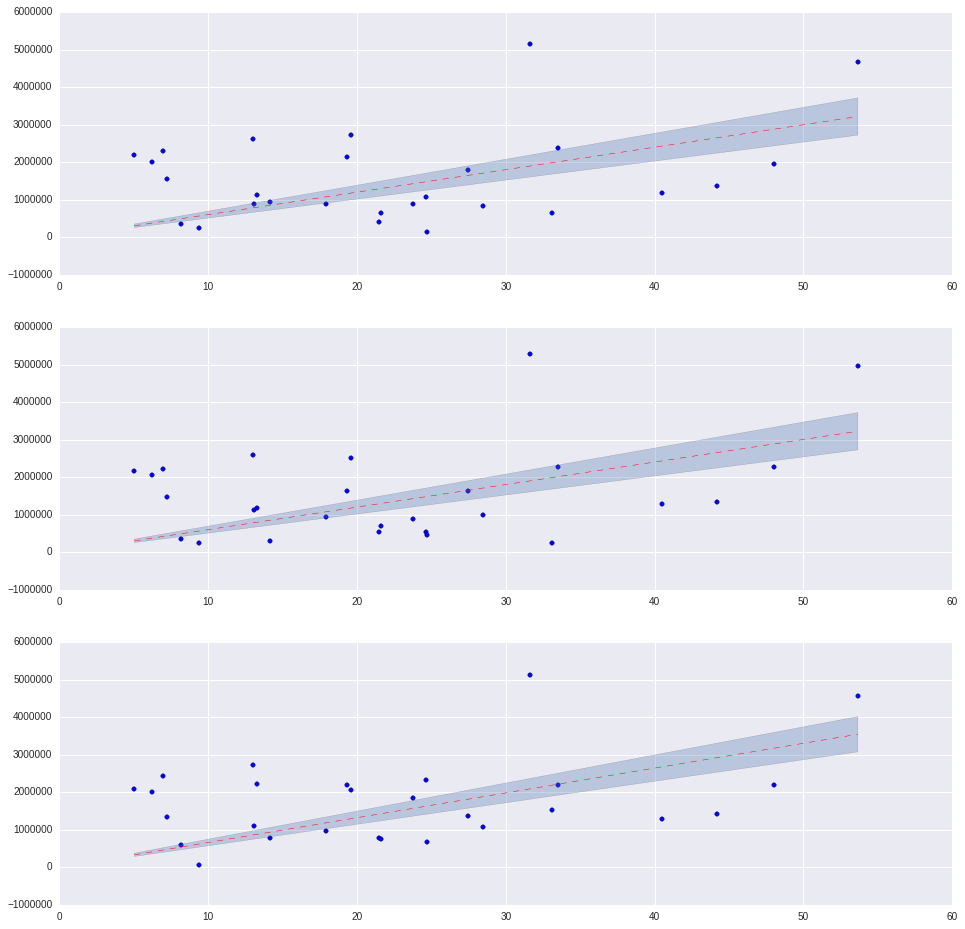

In [62]:
xx=np.linspace(df.Distance.min(),df.Distance.max())
plt.figure(figsize=(16,16))
ax1=plt.subplot(311)
ax1.scatter(df.Distance,df.V_cak)
ax1.plot(xx,HubbleLaw(xx,p1),'r--',linewidth=0.5)
ax1.fill_between(xx,HubbleLaw(xx,p1+sd1),HubbleLaw(xx,p1-sd1),alpha=0.3)

ax2=plt.subplot(312)
ax2.scatter(df.Distance,df.V_cah)
ax2.plot(xx,HubbleLaw(xx,p2),'r--',linewidth=0.5)
ax2.fill_between(xx,HubbleLaw(xx,p2+sd2),HubbleLaw(xx,p2-sd2),alpha=0.3)

ax3=plt.subplot(313)
ax3.scatter(df.Distance,df.V_ha)
ax3.plot(xx,HubbleLaw(xx,p3),'r--',linewidth=0.5)
ax3.fill_between(xx,HubbleLaw(xx,p3+sd3),HubbleLaw(xx,p3-sd3),alpha=0.3)

In [120]:
np.max(np.sqrt([pc1,pc2,pc3]))

5954.7404804143871

In [63]:
np.mean([p1,p2,p3])

62026.495934490427

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb25ac4ef90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb253323550>]], dtype=object)

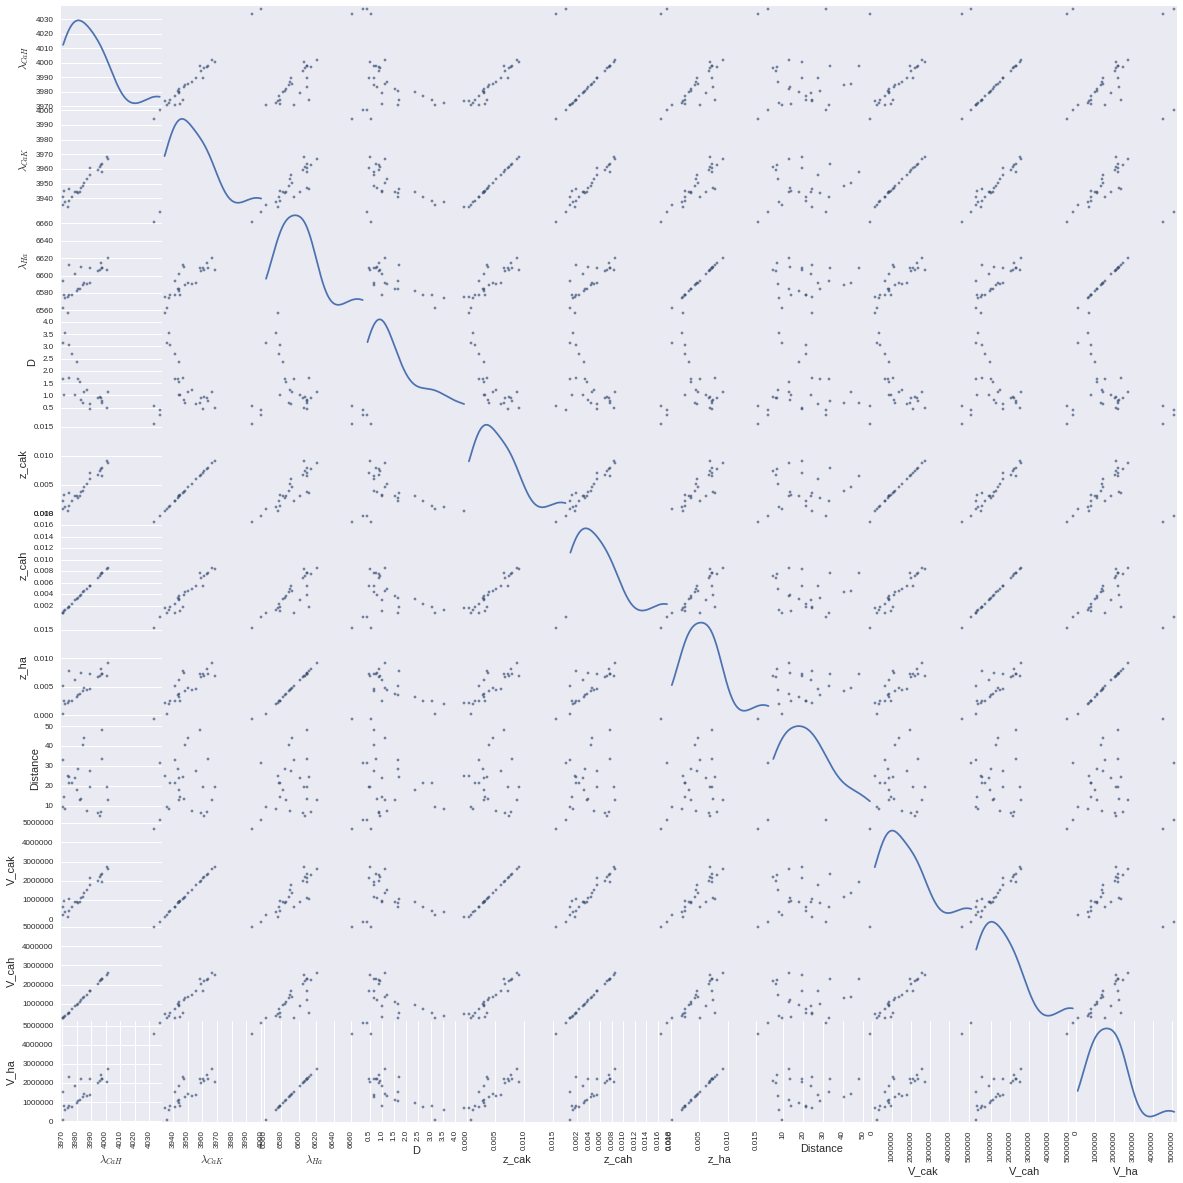

In [64]:
pd.scatter_matrix(df,alpha=0.7, figsize=(20, 20), diagonal='kde')